# Тематическое моделирование и создание вордклаудов

Источники:
- Тематическое моделирование с помощью Gensim https://webdevblog.ru/tematicheskoe-modelirovanie-s-pomoshhju-gensim-python/
- Generating WordClouds in Python https://www.datacamp.com/community/tutorials/wordcloud-python

# Импорт пакетов

In [1]:
#!pip install gensim
#!pip install pyLDAvis

In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

# Импорт текстов

In [3]:
df80s = pd.read_csv('lemma/lemma_80.csv',delimiter=',')
df90s = pd.read_csv('lemma/lemma_90.csv',delimiter=',')
df00s = pd.read_csv('lemma/lemma_00.csv',delimiter=',')
df10s = pd.read_csv('lemma/lemma_10.csv',delimiter=',')
df20s = pd.read_csv('lemma/lemma_20.csv',delimiter=',')

In [4]:
data80s = df80s.values.tolist()
data90s = df90s.values.tolist()
data00s = df00s.values.tolist()
data10s = df10s.values.tolist()
data20s = df20s.values.tolist()

Создаем переменные, содержащие все тексты песен по декадам для создания вордклаудов.

In [5]:
def summary(data):
    summary = ''
    for row in data:
        summary = summary + row[0]
    return summary

summary80s = summary(data80s)
summary90s = summary(data90s)
summary00s = summary(data00s)
summary10s = summary(data10s)
summary20s = summary(data20s)

# Токенизация

In [6]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

data_words80s = list(sent_to_words(data80s))
data_words90s = list(sent_to_words(data90s))
data_words00s = list(sent_to_words(data00s))
data_words10s = list(sent_to_words(data10s))
data_words20s = list(sent_to_words(data20s))

# Создание биграмм

In [7]:
def make_bigrams80s(texts):
    return [bigram_mod80s[doc] for doc in texts]
            
def make_bigrams90s(texts):
    return [bigram_mod90s[doc] for doc in texts]
            
def make_bigrams00s(texts):
    return [bigram_mod00s[doc] for doc in texts]
            
def make_bigrams10s(texts):
    return [bigram_mod10s[doc] for doc in texts]
            
def make_bigrams20s(texts):
    return [bigram_mod20s[doc] for doc in texts]

bigram80s = gensim.models.Phrases(data_words80s, min_count=5, threshold=100)
bigram90s = gensim.models.Phrases(data_words90s, min_count=5, threshold=100)
bigram00s = gensim.models.Phrases(data_words00s, min_count=5, threshold=100)
bigram10s = gensim.models.Phrases(data_words10s, min_count=5, threshold=100)
bigram20s = gensim.models.Phrases(data_words20s, min_count=5, threshold=100)

bigram_mod80s = gensim.models.phrases.Phraser(bigram80s)
bigram_mod90s = gensim.models.phrases.Phraser(bigram90s)
bigram_mod00s = gensim.models.phrases.Phraser(bigram00s)
bigram_mod10s = gensim.models.phrases.Phraser(bigram10s)
bigram_mod20s = gensim.models.phrases.Phraser(bigram20s)

data_w_bigrams_80s = make_bigrams80s(data_words80s)
data_w_bigrams_90s = make_bigrams90s(data_words90s)
data_w_bigrams_00s = make_bigrams00s(data_words00s)
data_w_bigrams_10s = make_bigrams10s(data_words10s)
data_w_bigrams_20s = make_bigrams20s(data_words20s)

# Создадие словаря и корпуса

In [8]:
id2word80s = corpora.Dictionary(data_w_bigrams_80s)
id2word90s = corpora.Dictionary(data_w_bigrams_90s)
id2word00s = corpora.Dictionary(data_w_bigrams_00s)
id2word10s = corpora.Dictionary(data_w_bigrams_10s)
id2word20s = corpora.Dictionary(data_w_bigrams_20s)

texts80s = data_w_bigrams_80s
texts90s = data_w_bigrams_90s
texts00s = data_w_bigrams_00s
texts10s = data_w_bigrams_10s
texts20s = data_w_bigrams_20s

corpus80s = [id2word80s.doc2bow(text) for text in texts80s]
corpus90s = [id2word90s.doc2bow(text) for text in texts90s]
corpus00s = [id2word00s.doc2bow(text) for text in texts00s]
corpus10s = [id2word10s.doc2bow(text) for text in texts10s]
corpus20s = [id2word20s.doc2bow(text) for text in texts20s]

# Построение тематической модели

In [9]:
lda_model80s = gensim.models.ldamodel.LdaModel(corpus=corpus80s,
                                           id2word=id2word80s,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
lda_model90s = gensim.models.ldamodel.LdaModel(corpus=corpus90s,
                                           id2word=id2word90s,
                                           num_topics=7, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
lda_model00s = gensim.models.ldamodel.LdaModel(corpus=corpus00s,
                                           id2word=id2word00s,
                                           num_topics=8, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
lda_model10s = gensim.models.ldamodel.LdaModel(corpus=corpus10s,
                                           id2word=id2word10s,
                                           num_topics=9, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
lda_model20s = gensim.models.ldamodel.LdaModel(corpus=corpus20s,
                                           id2word=id2word20s,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [10]:
lda_model80s.print_topics()

[(0,
  '0.032*"девчонка" + 0.012*"звезда" + 0.010*"что_думать" + 0.010*"ребенок" + 0.010*"люси_оооо" + 0.008*"день" + 0.008*"глаз" + 0.008*"школьница" + 0.008*"позвонить" + 0.008*"никуда"'),
 (1,
  '0.019*"день" + 0.017*"маргарита" + 0.013*"это" + 0.011*"пусть" + 0.011*"ты" + 0.010*"забыть" + 0.010*"вечер" + 0.010*"мои" + 0.009*"окно" + 0.008*"твои"'),
 (2,
  '0.019*"хотеть" + 0.018*"окно" + 0.016*"миллион" + 0.016*"влюбить" + 0.013*"билет" + 0.012*"яблоко_снег" + 0.011*"конь" + 0.009*"алиса" + 0.008*"жизнь" + 0.008*"друг"'),
 (3,
  '0.050*"рыжии" + 0.042*"оо" + 0.019*"нанананан" + 0.017*"суббота" + 0.014*"кот" + 0.010*"позади" + 0.009*"сто" + 0.008*"каскадер" + 0.008*"табу_дап" + 0.008*"знать"'),
 (4,
  '0.021*"любовь" + 0.013*"ходить" + 0.008*"ооо" + 0.008*"париж" + 0.007*"аpиадно" + 0.007*"долго" + 0.006*"старыи_мельница" + 0.006*"мои" + 0.006*"твои" + 0.006*"вовсе"')]

In [11]:
lda_model90s.print_topics()

[(0,
  '0.022*"говорить" + 0.019*"такси" + 0.013*"любить" + 0.012*"хотеть" + 0.012*"стать" + 0.010*"это" + 0.009*"ты" + 0.009*"море" + 0.009*"мои" + 0.008*"ждать"'),
 (1,
  '0.035*"видно" + 0.023*"любить" + 0.018*"любовь" + 0.017*"знать" + 0.015*"сказать" + 0.015*"какаокакао_кокококо" + 0.015*"холодная" + 0.011*"судьба" + 0.011*"посмеяться" + 0.011*"хотеть"'),
 (2,
  '0.030*"пиво" + 0.028*"пить" + 0.025*"манить" + 0.017*"твои" + 0.016*"забыть" + 0.016*"осень" + 0.012*"любить" + 0.011*"хопхея_лалалэя" + 0.011*"карусель" + 0.010*"давно"'),
 (3,
  '0.038*"любовь" + 0.034*"туча" + 0.025*"человек" + 0.017*"твои" + 0.013*"написать" + 0.012*"свет" + 0.011*"слеза" + 0.011*"мои" + 0.009*"атлантида" + 0.009*"ясныи"'),
 (4,
  '0.029*"ты" + 0.024*"милыи" + 0.012*"любовь" + 0.012*"день" + 0.012*"весна" + 0.011*"ночь" + 0.010*"быть" + 0.009*"лунныи" + 0.008*"приити" + 0.008*"небо"'),
 (5,
  '0.023*"ты" + 0.020*"знать" + 0.017*"любовь" + 0.014*"время" + 0.013*"это" + 0.013*"сказать" + 0.011*"говорить

In [12]:
lda_model00s.print_topics()

[(0,
  '0.021*"это" + 0.019*"любить" + 0.013*"disco_superstar" + 0.012*"любовь" + 0.012*"твои" + 0.010*"все" + 0.010*"знать" + 0.010*"мои" + 0.009*"отпустить" + 0.009*"ее"'),
 (1,
  '0.016*"наш" + 0.015*"небо" + 0.013*"плакать" + 0.013*"танец" + 0.013*"все" + 0.013*"падать" + 0.012*"это" + 0.012*"знать" + 0.011*"звезда" + 0.010*"любовь"'),
 (2,
  '0.060*"река" + 0.038*"твои" + 0.032*"тая" + 0.032*"рука" + 0.020*"ее" + 0.018*"узнать" + 0.013*"танцевать" + 0.010*"наш" + 0.008*"знать" + 0.008*"губа"'),
 (3,
  '0.022*"бежать" + 0.020*"твои" + 0.013*"set_it" + 0.012*"лететь" + 0.011*"lonely_lonely" + 0.011*"it_again" + 0.011*"любить" + 0.011*"танцевать" + 0.010*"плакать" + 0.010*"целовать_везде"'),
 (4,
  '0.031*"такои" + 0.025*"звезда" + 0.024*"любовь" + 0.024*"гдеть" + 0.019*"ты" + 0.011*"девушка" + 0.010*"пара" + 0.010*"твои" + 0.008*"все" + 0.008*"кино"'),
 (5,
  '0.018*"мои" + 0.012*"небо" + 0.011*"хотеть" + 0.010*"любить" + 0.009*"это" + 0.009*"you" + 0.008*"ои_люли" + 0.008*"ночнои" 

In [13]:
lda_model10s.print_topics()

[(0,
  '0.130*"me" + 0.024*"давать" + 0.014*"смаилик" + 0.013*"мама" + 0.012*"знать" + 0.012*"люба_давать" + 0.011*"the" + 0.010*"you" + 0.009*"прислать_хотя" + 0.008*"ya"'),
 (1,
  '0.025*"утро" + 0.021*"любовь" + 0.019*"ты" + 0.017*"это" + 0.016*"жизнь" + 0.015*"засыпать" + 0.012*"мои" + 0.011*"твои" + 0.011*"один" + 0.010*"все"'),
 (2,
  '0.020*"пока" + 0.016*"город_спать" + 0.011*"день" + 0.011*"это" + 0.010*"твои" + 0.010*"добрыи" + 0.010*"знать" + 0.009*"быть" + 0.009*"хорошии" + 0.008*"утро"'),
 (3,
  '0.028*"еще" + 0.023*"почему" + 0.020*"мои" + 0.015*"отбирать" + 0.015*"крыло" + 0.013*"нужныи" + 0.013*"готовыи" + 0.013*"видеть" + 0.013*"полополовина_полополовина" + 0.009*"ты"'),
 (4,
  '0.031*"такои" + 0.027*"весь" + 0.016*"идти" + 0.012*"дышать" + 0.011*"печаль" + 0.010*"твои" + 0.008*"дольче_габбан" + 0.008*"сердце" + 0.007*"видимо_убить" + 0.007*"знать"'),
 (5,
  '0.027*"хотеть" + 0.024*"мама" + 0.016*"счастие" + 0.012*"быть" + 0.012*"около" + 0.010*"бог" + 0.009*"твои" + 0

In [14]:
lda_model20s.print_topics()

[(0,
  '0.018*"хотеть" + 0.017*"lonely" + 0.017*"ты" + 0.016*"you" + 0.013*"boomboom" + 0.012*"самыи" + 0.012*"твои" + 0.011*"дать" + 0.010*"шота" + 0.009*"сестра"'),
 (1,
  '0.027*"ты" + 0.014*"любить" + 0.012*"это" + 0.011*"снова" + 0.011*"любовь" + 0.011*"все" + 0.009*"мои" + 0.009*"просто" + 0.008*"мы" + 0.008*"чтоть"'),
 (2,
  '0.023*"пьяныи" + 0.022*"твои" + 0.021*"ты" + 0.017*"боль" + 0.013*"леи" + 0.012*"мои" + 0.009*"небо" + 0.008*"знать" + 0.008*"это" + 0.007*"глаз"'),
 (3,
  '0.027*"быть" + 0.018*"твои" + 0.015*"мои" + 0.012*"сердце" + 0.012*"это" + 0.011*"видеть" + 0.010*"ты" + 0.008*"слеза" + 0.008*"бежать" + 0.008*"любить"'),
 (4,
  '0.024*"любовь" + 0.020*"твои" + 0.017*"это" + 0.016*"все" + 0.014*"нужныи" + 0.011*"мы" + 0.011*"любить" + 0.010*"плакать" + 0.010*"этот" + 0.009*"быть"')]

# Вычисление сложности модели и ее когерентности

In [15]:
print('\nPerplexity: ', lda_model80s.log_perplexity(corpus80s))
coherence_model_lda80s = CoherenceModel(model=lda_model80s, texts=data_w_bigrams_80s, dictionary=id2word80s, coherence='c_v')
coherence_lda80s = coherence_model_lda80s.get_coherence()
print('\nCoherence Score: ', coherence_lda80s)


Perplexity:  -6.811684084763987

Coherence Score:  0.43774704226131345


In [16]:
print('\nPerplexity: ', lda_model90s.log_perplexity(corpus90s))
coherence_model_lda90s = CoherenceModel(model=lda_model90s, texts=data_w_bigrams_90s, dictionary=id2word90s, coherence='c_v')
coherence_lda90s = coherence_model_lda90s.get_coherence()
print('\nCoherence Score: ', coherence_lda90s)


Perplexity:  -6.591821084090112

Coherence Score:  0.36780769160921867


In [17]:
print('\nPerplexity: ', lda_model00s.log_perplexity(corpus00s))
coherence_model_lda00s = CoherenceModel(model=lda_model00s, texts=data_w_bigrams_00s, dictionary=id2word00s, coherence='c_v')
coherence_lda00s = coherence_model_lda00s.get_coherence()
print('\nCoherence Score: ', coherence_lda00s)


Perplexity:  -6.660781188289144

Coherence Score:  0.3895028395879728


In [18]:
print('\nPerplexity: ', lda_model10s.log_perplexity(corpus10s))
coherence_model_lda10s = CoherenceModel(model=lda_model10s, texts=data_w_bigrams_10s, dictionary=id2word10s, coherence='c_v')
coherence_lda10s = coherence_model_lda10s.get_coherence()
print('\nCoherence Score: ', coherence_lda10s)


Perplexity:  -6.801969964634076

Coherence Score:  0.3862950995703574


In [19]:
print('\nPerplexity: ', lda_model20s.log_perplexity(corpus20s))
coherence_model_lda20s = CoherenceModel(model=lda_model20s, texts=data_w_bigrams_20s, dictionary=id2word20s, coherence='c_v')
coherence_lda20s = coherence_model_lda20s.get_coherence()
print('\nCoherence Score: ', coherence_lda20s)


Perplexity:  -6.722586451405761

Coherence Score:  0.35340922050187806


# Визуализация темы и ключевых слов

In [20]:
pyLDAvis.enable_notebook()
vis80s = pyLDAvis.gensim.prepare(lda_model80s, corpus80s, id2word80s)
vis80s

c:\users\orl\appdata\local\programs\python\python37\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.009310 -0.031922       1        1  34.111019
4      0.082835 -0.107209       2        1  20.284782
2      0.068924  0.180236       3        1  19.476492
3     -0.187615  0.008517       4        1  14.936790
0      0.045167 -0.049622       5        1  11.190917, topic_info=     Category       Freq         Term      Total  loglift  logprob
1258  Default  56.000000        рыжии  56.000000  30.0000  30.0000
279   Default  47.000000           оо  47.000000  29.0000  29.0000
128   Default  29.000000     девчонка  29.000000  28.0000  28.0000
1430  Default  43.000000    маргарита  43.000000  27.0000  27.0000
278   Default  21.000000    нанананан  21.000000  26.0000  26.0000
971   Default  19.000000      суббота  19.000000  25.0000  25.0000
164   Default  26.000000      влюбить  26.000000  24.0000  24.0000
178   Default  26.000000      миллион  26.000000  23.0000  23.0000
121   Default  35.000000       хотеть  35.000000  22.0000  22.0000
1858  Default  33.000000          кот  33.000000  21.0000  21.0000
1143  Default  19.000000        билет  19.000000  20.0000  20.0000
1060  Default  17.000000  яблоко_снег  17.000000  19.0000  19.0000
855   Default  21.000000       ходить  21.000000  18.0000  18.0000
97    Default  51.000000         окно  51.000000  17.0000  17.0000
662   Default  16.000000         конь  16.000000  16.0000  16.0000
90    Default  60.000000       любовь  60.000000  15.0000  15.0000
34    Default  15.000000       звезда  15.000000  14.0000  14.0000
797   Default  12.000000       позади  12.000000  13.0000  13.0000
1657  Default  13.000000        алиса  13.000000  12.0000  12.0000
1382  Default   8.000000   что_думать   8.000000  11.0000  11.0000
129   Default  66.000000         день  66.000000  10.0000  10.0000
850   Default   9.000000      ребенок   9.000000   9.0000   9.0000
1727  Default   9.000000    люси_оооо   9.000000   8.0000   8.0000
10    Default  12.000000          ооо  12.000000   7.0000   7.0000
977   Default   9.000000     каскадер   9.000000   6.0000   6.0000
1850  Default   9.000000     табу_дап   9.000000   5.0000   5.0000
1283  Default  11.000000        париж  11.000000   4.0000   4.0000
233   Default  43.000000          это  43.000000   3.0000   3.0000
284   Default   8.000000       привет   8.000000   2.0000   2.0000
232   Default  18.000000      учкудук  18.000000   1.0000   1.0000
...       ...        ...          ...        ...      ...      ...
843    Topic5   2.865452  невпроворот   3.520571   1.9842  -5.6691
840    Topic5   2.865257         мода   3.520581   1.9841  -5.6692
1633   Topic5   2.864459       жеглов   3.519761   1.9841  -5.6695
832    Topic5   2.865085     братишка   3.520619   1.9840  -5.6693
852    Topic5   2.864818    сестренка   3.520685   1.9839  -5.6694
495    Topic5   6.251554       никуда   7.824574   1.9656  -4.8890
500    Topic5   6.236180   улыбнуться   7.828232   1.9627  -4.8915
1600   Topic5   2.190255       болеть   2.833277   1.9327  -5.9378
1606   Topic5   2.190227      лопатка   2.833281   1.9326  -5.9379
1607   Topic5   2.189471        молва   2.833346   1.9323  -5.9382
1613   Topic5   2.189466   признаться   2.833343   1.9323  -5.9382
1611   Topic5   2.189307    поговорка   2.833360   1.9322  -5.9383
1620   Topic5   2.184806         атас   2.834000   1.9299  -5.9403
34     Topic5   9.699093       звезда  15.394470   1.7281  -4.4498
410    Topic5   3.550546     небесныи   5.074525   1.8329  -5.4548
772    Topic5   6.288015    позвонить  10.862846   1.6434  -4.8832
402    Topic5   5.601869        голос   9.436765   1.6686  -4.9988
127    Topic5   6.978786         глаз  22.892065   1.0022  -4.7790
838    Topic5   3.558963         мама   7.372721   1.4618  -5.4524
107    Topic5   4.850456         свои  18.952852   0.8272  -5.1428
129    Topic5   7.038794         день  66.493149  -0.0556  -4.7704
115    Topic5   4.211787    

In [21]:
vis90s = pyLDAvis.gensim.prepare(lda_model90s, corpus90s, id2word90s)
vis90s

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.113152 -0.006596       1        1  18.524755
2     -0.192726  0.068128       2        1  16.284960
0     -0.006127  0.047629       3        1  15.095520
1      0.081960  0.131321       4        1  14.726032
4      0.067269 -0.030279       5        1  12.469820
3     -0.040855 -0.037182       6        1  12.387114
6     -0.022672 -0.173021       7        1  10.511799, topic_info=     Category        Freq                 Term       Total  loglift  logprob
3     Default   52.000000                видно   52.000000  30.0000  30.0000
514   Default   39.000000                 туча   39.000000  29.0000  29.0000
310   Default   52.000000                 пиво   52.000000  28.0000  28.0000
312   Default   48.000000                 пить   48.000000  27.0000  27.0000
425   Default   40.000000               манить   40.000000  26.0000  26.0000
516   Default   30.000000              человек   30.000000  25.0000  25.0000
400   Default   39.000000                 туда   39.000000  24.0000  24.0000
350   Default   38.000000                милыи   38.000000  23.0000  23.0000
649   Default   28.000000                такси   28.000000  22.0000  22.0000
5     Default   74.000000             говорить   74.000000  21.0000  21.0000
1566  Default   20.000000  какаокакао_кокококо   20.000000  20.0000  20.0000
1373  Default   20.000000             холодная   20.000000  19.0000  19.0000
386   Default   35.000000                осень   35.000000  18.0000  18.0000
11    Default  136.000000               любовь  136.000000  17.0000  17.0000
95    Default  112.000000                   ты  112.000000  16.0000  16.0000
68    Default   19.000000                 лето   19.000000  15.0000  15.0000
179   Default   32.000000                мечта   32.000000  14.0000  14.0000
10    Default   78.000000               любить   78.000000  13.0000  13.0000
1695  Default   17.000000       хопхея_лалалэя   17.000000  12.0000  12.0000
20    Default   55.000000              сказать   55.000000  11.0000  11.0000
352   Default   16.000000             написать   16.000000  10.0000  10.0000
458   Default   38.000000               забыть   38.000000   9.0000   9.0000
1913  Default   16.000000             карусель   16.000000   8.0000   8.0000
16    Default   16.000000           посмеяться   16.000000   7.0000   7.0000
1613  Default   12.000000     маленькии_страна   12.000000   6.0000   6.0000
4     Default   33.000000                время   33.000000   5.0000   5.0000
1596  Default   12.000000       строгии_цветок   12.000000   4.0000   4.0000
1586  Default   11.000000       желтыи_тюльпан   11.000000   3.0000   3.0000
205   Default   80.000000                 твои   80.000000   2.0000   2.0000
45    Default   46.000000               хотеть   46.000000   1.0000   1.0000
...       ...         ...                  ...         ...      ...      ...
1057   Topic7    3.182527              страсть    3.921204   2.0439  -5.7202
1058   Topic7    3.180158            тельняшка    3.921335   2.0432  -5.7209
405    Topic7    6.279598               цветок    7.824516   2.0327  -5.0406
157    Topic7    6.270257             соити_ум    7.848545   2.0282  -5.0420
381    Topic7    5.511490                 мост    7.086008   2.0014  -5.1710
1617   Topic7    2.430212               светло    3.145406   1.9947  -5.9899
584    Topic7    2.429512            подмешать    3.145345   1.9944  -5.9902
904    Topic7    2.428547              опалить    3.145616   1.9940  -5.9906
898    Topic7    2.428272             недалеко    3.145637   1.9938  -5.9907
68     Topic7   13.958070                 лето   19.857420   1.9002  -4.2418
400    Topic7   24.038794                 туда   39.661430   1.7520  -3.6982
315    Topic7    9.352180              помнить   16.004036   1.7154  -4.6423
558    Topic7    4.735386             утреннии    7.185781   1.8356  -5.3228
179   

In [22]:
vis00s = pyLDAvis.gensim.prepare(lda_model00s, corpus00s, id2word00s)
vis00s

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.033537 -0.043974       1        1  18.045614
0     -0.007775  0.020425       2        1  14.265305
5     -0.032147 -0.188609       3        1  14.261596
4      0.125496 -0.043484       4        1  13.279902
6      0.107382  0.075304       5        1  12.849174
3     -0.041541  0.128990       6        1   9.721788
2     -0.208305  0.012517       7        1   9.010531
1      0.023353  0.038831       8        1   8.566091, topic_info=     Category        Freq             Term       Total  loglift  logprob
528   Default   69.000000             река   69.000000  30.0000  30.0000
355   Default  140.000000             быть  140.000000  29.0000  29.0000
533   Default   42.000000              тая   42.000000  28.0000  28.0000
274   Default   72.000000            такои   72.000000  27.0000  27.0000
31    Default   72.000000             рука   72.000000  26.0000  26.0000
35    Default  169.000000             твои  169.000000  25.0000  25.0000
44    Default   46.000000            гдеть   46.000000  24.0000  24.0000
300   Default   62.000000           звезда   62.000000  23.0000  23.0000
338   Default   38.000000               ее   38.000000  22.0000  22.0000
2373  Default   28.000000               ое   28.000000  21.0000  21.0000
41    Default   36.000000           бежать   36.000000  20.0000  20.0000
55    Default   71.000000           лететь   71.000000  19.0000  19.0000
444   Default   34.000000        танцевать   34.000000  18.0000  18.0000
165   Default   24.000000           узнать   24.000000  17.0000  17.0000
763   Default   31.000000              наш   31.000000  16.0000  16.0000
1556  Default   21.000000  disco_superstar   21.000000  15.0000  15.0000
559   Default   25.000000          аияиять   25.000000  14.0000  14.0000
843   Default   41.000000          плакать   41.000000  13.0000  13.0000
275   Default   23.000000            танец   23.000000  12.0000  12.0000
423   Default   14.000000           set_it   14.000000  11.0000  11.0000
216   Default   17.000000          малинка   17.000000  10.0000  10.0000
217   Default   17.000000        малиновыи   17.000000   9.0000   9.0000
841   Default   16.000000             пара   16.000000   8.0000   8.0000
103   Default   85.000000              мои   85.000000   7.0000   7.0000
1154  Default   13.000000    lonely_lonely   13.000000   6.0000   6.0000
1009  Default   17.000000           падать   17.000000   5.0000   5.0000
420   Default   15.000000         it_again   15.000000   4.0000   4.0000
82    Default  153.000000               ты  153.000000   3.0000   3.0000
972   Default   16.000000             зима   16.000000   2.0000   2.0000
20    Default  118.000000           любовь  118.000000   1.0000   1.0000
...       ...         ...              ...         ...      ...      ...
160    Topic8    4.666224        разоитись    6.265689   2.1626  -5.3477
1009   Topic8   12.258835           падать   17.169754   2.1205  -4.3818
1124   Topic8    7.710393           капать   11.033850   2.0990  -4.8455
275    Topic8   13.024745            танец   23.897377   1.8504  -4.3212
763    Topic8   15.325396              наш   31.829704   1.7265  -4.1585
530    Topic8    4.636378             снег    7.143590   2.0251  -5.3541
972    Topic8    9.229381             зима   16.967100   1.8485  -4.6656
1310   Topic8    6.262781         хотеться   10.979929   1.8959  -5.0534
236    Topic8    6.952248         остаться   15.335606   1.6662  -4.9490
1834   Topic8    3.140323          планета    4.714419   2.0511  -5.7437
843    Topic8   13.074237          плакать   41.190079   1.3098  -4.3174
525    Topic8    9.205678         простить   24.281311   1.4875  -4.6682
22     Topic8   14.608706             небо   67.064667   0.9333  -4.2064
212    Topic8    7.725160             лето   24.323587   1.3104  -4.8436
520    Topic8    4.639655          подруга    8.749508   1.

In [23]:
vis10s = pyLDAvis.gensim.prepare(lda_model10s, corpus10s, id2word10s)
vis10s

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.085964 -0.027099       1        1  16.277233
5      0.040935  0.042811       2        1  13.715848
2      0.047326  0.032405       3        1  13.628270
6      0.070931 -0.074870       4        1  11.640442
7      0.024870 -0.124601       5        1  11.541813
4     -0.006211  0.198265       6        1  10.163486
8      0.049979 -0.009910       7        1   9.951764
0     -0.300600 -0.030241       8        1   9.486683
3     -0.013193 -0.006760       9        1   3.594454, topic_info=     Category        Freq         Term       Total  loglift  logprob
113   Default  154.000000           me  154.000000  30.0000  30.0000
16    Default  133.000000          мои  133.000000  29.0000  29.0000
439   Default   53.000000        такои   53.000000  28.0000  28.0000
354   Default   62.000000         мама   62.000000  27.0000  27.0000
2380  Default   29.000000    дать_пять   29.000000  26.0000  26.0000
313   Default   71.000000         утро   71.000000  25.0000  25.0000
121   Default   67.000000         весь   67.000000  24.0000  24.0000
280   Default   39.000000       давать   39.000000  23.0000  23.0000
131   Default   25.000000          еще   25.000000  22.0000  22.0000
2647  Default   27.000000  город_спать   27.000000  21.0000  21.0000
256   Default   48.000000      любимыи   48.000000  20.0000  20.0000
1206  Default   24.000000       почему   24.000000  19.0000  19.0000
380   Default   33.000000     засыпать   33.000000  18.0000  18.0000
42    Default   89.000000       хотеть   89.000000  17.0000  17.0000
67    Default   45.000000         пока   45.000000  16.0000  16.0000
38    Default  146.000000           ты  146.000000  15.0000  15.0000
132   Default   48.000000        жизнь   48.000000  14.0000  14.0000
2734  Default   17.000000      смаилик   17.000000  13.0000  13.0000
587   Default   21.000000        около   21.000000  12.0000  12.0000
77    Default   74.000000      счастие   74.000000  11.0000  11.0000
14    Default  123.000000       любовь  123.000000  10.0000  10.0000
3     Default  109.000000          все  109.000000   9.0000   9.0000
35    Default  147.000000         твои  147.000000   8.0000   8.0000
406   Default   31.000000       нужныи   31.000000   7.0000   7.0000
352   Default   15.000000  люба_давать   15.000000   6.0000   6.0000
133   Default   43.000000         идти   43.000000   5.0000   5.0000
90    Default   13.000000        крыло   13.000000   4.0000   4.0000
176   Default   28.000000       видеть   28.000000   3.0000   3.0000
94    Default   51.000000       любить   51.000000   2.0000   2.0000
8     Default   33.000000       дышать   33.000000   1.0000   1.0000
...       ...         ...          ...         ...      ...      ...
2199   Topic9    0.657272        право    1.393132   2.5746  -6.5182
2200   Topic9    0.657174       сажать    1.393171   2.5744  -6.5184
2198   Topic9    0.657167   подпускать    1.393173   2.5744  -6.5184
2057   Topic9    0.655987         ноль    1.393657   2.5722  -6.5202
1206   Topic9   10.124337       почему   24.964266   2.4233  -3.7836
555    Topic9    3.608534        чужои    8.551115   2.4630  -4.8152
2192   Topic9    1.249509     пропасть    2.789470   2.5227  -5.8758
1524   Topic9    1.249921       острыи    2.793872   2.5214  -5.8755
2172   Topic9    1.243136        спеть    2.791872   2.5167  -5.8809
1224   Topic9    1.249488     открытыи    2.828808   2.5087  -5.8758
390    Topic9    1.246321         кожа    2.850930   2.4983  -5.8783
229    Topic9    4.216758        мечта   14.112875   2.1178  -4.6595
329    Topic9    3.616135       отдать   11.982868   2.1277  -4.8131
176    Topic9    5.982026       видеть   28.350401   1.7699  -4.3098
1489   Topic9    1.837572        выити    5.043982   2.3160  -5.4901
406    Topic9    5.987731       нужныи   31.675213   1.6600  -4.3088
63     Topic9    3.023514        наяву   11.410550 

In [24]:
vis20s = pyLDAvis.gensim.prepare(lda_model20s, corpus20s, id2word20s)
vis20s

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.185558 -0.008398       1        1  32.344616
2     -0.028771  0.146486       2        1  17.493591
3     -0.048839  0.009911       3        1  17.388996
1     -0.036832 -0.124496       4        1  17.366051
4     -0.071116 -0.023504       5        1  15.406749, topic_info=     Category        Freq           Term       Total  loglift  logprob
407   Default   44.000000         пьяныи   44.000000  30.0000  30.0000
807   Default   53.000000         lonely   53.000000  29.0000  29.0000
451   Default   49.000000            you   49.000000  28.0000  28.0000
1202  Default   40.000000       boomboom   40.000000  27.0000  27.0000
226   Default   92.000000           быть   92.000000  26.0000  26.0000
452   Default   37.000000           боль   37.000000  25.0000  25.0000
848   Default   21.000000            леи   21.000000  24.0000  24.0000
202   Default   89.000000         любовь   89.000000  23.0000  23.0000
1367  Default   31.000000           шота   31.000000  22.0000  22.0000
114   Default   40.000000          самыи   40.000000  21.0000  21.0000
19    Default  137.000000           твои  137.000000  20.0000  20.0000
116   Default   28.000000         сестра   28.000000  19.0000  19.0000
11    Default   32.000000         нужныи   32.000000  18.0000  18.0000
1154  Default   20.000000        плакать   20.000000  17.0000  17.0000
229   Default   69.000000            все   69.000000  16.0000  16.0000
1701  Default   12.000000       соити_ум   12.000000  15.0000  15.0000
2049  Default   12.000000  девочкакосмос   12.000000  14.0000  14.0000
1191  Default   22.000000       капелька   22.000000  13.0000  13.0000
349   Default   38.000000           дать   38.000000  12.0000  12.0000
1190  Default   21.000000         капать   21.000000  11.0000  11.0000
225   Default   21.000000           этот   21.000000  10.0000  10.0000
1683  Default   11.000000         спрячь   11.000000   9.0000   9.0000
423   Default   17.000000          чтоть   17.000000   8.0000   8.0000
536   Default   39.000000          слеза   39.000000   7.0000   7.0000
31    Default   32.000000         видеть   32.000000   6.0000   6.0000
1630  Default   12.000000     давить_газ   12.000000   5.0000   5.0000
214   Default   19.000000         почему   19.000000   4.0000   4.0000
233   Default   10.000000            еее   10.000000   3.0000   3.0000
20    Default  159.000000             ты  159.000000   2.0000   2.0000
75    Default   26.000000           небо   26.000000   1.0000   1.0000
...       ...         ...            ...         ...      ...      ...
1129   Topic5    2.487003           eyes    3.146618   1.6351  -6.3680
1132   Topic5    2.486973           mike    3.146607   1.6351  -6.3680
1134   Topic5    2.486744       paradise    3.146608   1.6350  -6.3681
1154   Topic5   14.902359        плакать   20.423752   1.5552  -4.5775
892    Topic5    4.812602         полныи    6.281406   1.6040  -5.7078
1463   Topic5    4.809477        соленыи    6.285500   1.6027  -5.7085
225    Topic5   14.591306           этот   21.310665   1.4916  -4.5986
11     Topic5   19.806709         нужныи   32.077618   1.3882  -4.2930
163    Topic5   12.581332         падать   22.458183   1.2909  -4.7468
1291   Topic5    9.461036           вино   15.742520   1.3612  -5.0319
202    Topic5   35.094379         любовь   89.092354   0.9387  -3.7210
250    Topic5    4.678759        улетать    6.301716   1.5726  -5.7360
55     Topic5   13.335445         забыть   29.636068   1.0718  -4.6886
229    Topic5   23.596439            все   69.445114   0.7909  -4.1180
198    Topic5    6.352410          земля   10.398505   1.3775  -5.4302
251    Topic5   24.196438            это   93.756332   0.5159  -4.0929
19     Topic5   29.257036           твои  137.745804   0.3211  -3.9029
8      Topic5   16.450626             мы   55.490337   0.6545  -4.4787
217    Topic5   11.807839    

Сохранение интерактивных диаграмм в html файлы:

In [25]:
pyLDAvis.save_html(vis80s, 'lda-html/lda80s.html')
pyLDAvis.save_html(vis90s, 'lda-html/lda90s.html')
pyLDAvis.save_html(vis00s, 'lda-html/lda00s.html')
pyLDAvis.save_html(vis10s, 'lda-html/lda10s.html')
pyLDAvis.save_html(vis20s, 'lda-html/lda20s.html')

# Облака слов

In [26]:
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
from skimage.color import rgb2gray
from skimage import io

cloud_mask = np.array(Image.open("img/star.png"))

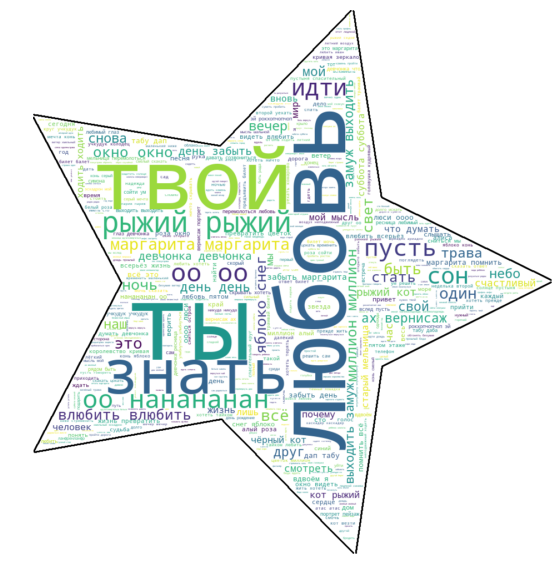

In [27]:
wc = WordCloud(background_color="white", max_words=500, mask=cloud_mask,
               contour_width=3, contour_color='black')

wc.generate(summary80s)
wc.to_file("img/word_cloud_80s.png")

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

---
# Построение модели LDA Mallet

In [28]:
import os
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
os.environ['MALLET_HOME'] = 'C:\\users\\orl\\cs102\\DH\\mallet-2.0.8'
mallet_path = 'C:\\Users\\orl\\cs102\\DH\\mallet-2.0.8\\bin\\mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus20s, num_topics=10, id2word=id2word20s)

In [29]:
pprint(ldamallet.show_topics(formatted=False))

coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_w_bigrams_20s, dictionary=id2word20s, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('снова', 0.05218317358892439),
   ('нужныи', 0.04153354632587859),
   ('глаз', 0.026624068157614485),
   ('капелька', 0.026624068157614485),
   ('говорить', 0.026624068157614485),
   ('капать', 0.025559105431309903),
   ('слово', 0.022364217252396165),
   ('это', 0.021299254526091587),
   ('слеза', 0.021299254526091587),
   ('видеть', 0.02023429179978701)]),
 (1,
  [('любовь', 0.12557077625570776),
   ('понять', 0.033105022831050226),
   ('рука', 0.0319634703196347),
   ('этот', 0.02968036529680365),
   ('человек', 0.021689497716894976),
   ('love', 0.021689497716894976),
   ('красивыи', 0.017123287671232876),
   ('знать', 0.017123287671232876),
   ('мои', 0.01598173515981735),
   ('ты', 0.014840182648401826)]),
 (2,
  [('нужно', 0.042723631508678236),
   ('верить', 0.04005340453938585),
   ('влюбиться', 0.03204272363150868),
   ('почему', 0.03204272363150868),
   ('время', 0.030707610146862484),
   ('слышать', 0.025367156208277702),
   ('нравиться', 0.022696929238985315),
   

# Нахождение оптимального количества тем для LDA

In [30]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word20s)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [31]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word20s, corpus=corpus20s, texts=data_w_bigrams_20s, start=2, limit=10, step=1)

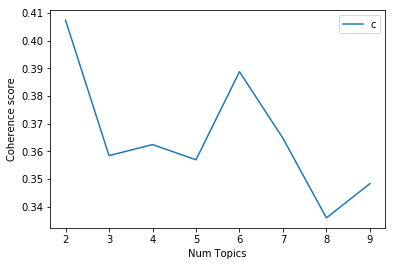

In [32]:
limit=10; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [33]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4074
Num Topics = 3  has Coherence Value of 0.3585
Num Topics = 4  has Coherence Value of 0.3625
Num Topics = 5  has Coherence Value of 0.357
Num Topics = 6  has Coherence Value of 0.3888
Num Topics = 7  has Coherence Value of 0.3647
Num Topics = 8  has Coherence Value of 0.336
Num Topics = 9  has Coherence Value of 0.3483


In [34]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.037*"все" + 0.030*"это" + 0.028*"сердце" + 0.025*"глаз" + 0.023*"слеза" + '
  '0.023*"боль" + 0.019*"ждать" + 0.018*"забыть" + 0.017*"пока" + '
  '0.016*"небо"'),
 (1,
  '0.041*"мы" + 0.036*"любовь" + 0.032*"хотеть" + 0.028*"boomboom" + '
  '0.025*"знать" + 0.021*"шота" + 0.020*"ты" + 0.018*"понять" + 0.017*"рука" + '
  '0.012*"человек"'),
 (2,
  '0.031*"ты" + 0.030*"пьяныи" + 0.024*"дать" + 0.023*"свои" + 0.022*"нужныи" '
  '+ 0.019*"самыи" + 0.018*"нужно" + 0.017*"твои" + 0.017*"дом" + '
  '0.016*"любить"'),
 (3,
  '0.032*"lonely" + 0.031*"мои" + 0.030*"ты" + 0.023*"хотеть" + 0.022*"быть" + '
  '0.020*"стать" + 0.017*"ночь" + 0.017*"сестра" + 0.013*"друг" + 0.013*"сон"'),
 (4,
  '0.069*"твои" + 0.040*"любить" + 0.036*"быть" + 0.026*"это" + 0.026*"любовь" '
  '+ 0.025*"ты" + 0.020*"снова" + 0.020*"просто" + 0.019*"душа" + '
  '0.018*"сказать"')]
